# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests
import time
import json

from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
############# LATITUDE AND LONGITUDE SIZE TO BE CHANGED TO SIZE = 1500 BEFORE SUBMITTING !!!!!!!!!!!

# Set random number seed 
np.random.seed(100)

# Create a list of random latitudes and longitudes
lats = np.random.randint(-90, 90, size=20)
longs = np.random.randint(-180, 180, size=20)

# Place these latitude and longitude lists into a DataFrame
coords = pd.DataFrame({"Latitude": lats, "Longitude": longs})

# Show preview of DataFrame
coords.head()

,Latitude,Longitude
0,-82,-43
1,-66,-87
2,-23,-94
3,13,-25
4,-3,-39


In [3]:
# Create empty list to append the retrieved cities
cities = []

# Create a loop to go through the coords dataframe rows and to look up the closest city from each latitude and longitude
for ind, row in coords.iterrows():
    
    # Retrieve the latitude and longitude for a row
    lat, lon = row['Latitude'], row['Longitude']
    
    # Use citipy to find closest city
    city = citipy.nearest_city(lat, lon)
    city = city.city_name
    
    # Add retrieved city to cities list if it is not already in the list
    if city not in cities:
        cities.append(city)

# Print the final amount of cities retrieved
len(cities)

20

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [18]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set time to pause between each loop to enable api data retrieval
time_between = 1

# Set empty lists to fill during loop
final_city = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Log counter
record = 0
set = 1

# Print log of each city
print("Beginning Data Retrieval")     
print("-----------------------------")

# Create a loop to loop through each city and retrieve weather data to append to lists, pausing for a second at the end of each loop   
for city in cities:    
            
    try:
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # Add to log counter
        if record >= 50:
            record = 1
            set += 1
            final_city.append(city)
        else:
            record += 1
            final_city.append(city)
            
        print(f"Processing Record {record} of Set {set} | {city}")
        
    except KeyError:
        print("City not found. Skipping...")

    time.sleep(time_between)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | trairi
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | kirkland lake
City not found. Skipping...
Processing Record 9 of Set 1 | santa cruz
Processing Record 10 of Set 1 | stawell
Processing Record 11 of Set 1 | ilhabela
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | tashtyp
Processing Record 16 of Set 1 | kidal
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | provideniya
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create a dataframe from the retrieved weather data
weather_dict = {"City": final_city,
                "Lat": lat,
                "Lng": long,
                "Max. Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date}

weather_data_df = pd.DataFrame(weather_dict)

# Show preview of weather dataframe
weather_data_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,48.20,40,40,12.66,AR,1618994487
1,punta arenas,-53.1500,-70.9167,32.00,80,40,6.91,CL,1618994637
2,pisco,-13.7000,-76.2167,64.40,88,1,10.36,PE,1618994638
3,sao filipe,14.8961,-24.4956,71.82,73,100,14.09,CV,1618994639
4,trairi,-3.2778,-39.2689,72.46,96,100,4.21,BR,1618994640


In [20]:
weather_data_df.count()

City          19
Lat           19
Lng           19
Max. Temp     19
Humidity      19
Cloudiness    19
Wind Speed    19
Country       19
Date          19
dtype: int64

In [21]:
# Create a summary statistics table frome the weather_data dataframe
weather_data_df[['Lat', 'Lng', 'Max. Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].describe()

,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Date
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01
mean,-3.360595,-1.144489,58.614211,66.894737,52.052632,8.986316,1.618995e+09
std,39.684823,97.005995,20.913650,23.165815,39.829461,6.292926,7.986051e+01
min,-54.800000,-173.300000,15.800000,4.000000,0.000000,1.010000,1.618994e+09
25%,-32.926000,-69.608350,46.400000,57.000000,9.500000,4.400000,1.618995e+09
50%,-17.800000,-24.495600,64.400000,73.000000,60.000000,6.910000,1.618995e+09
75%,20.363300,73.827900,73.225000,83.000000,92.000000,12.660000,1.618995e+09
max,70.857800,152.916700,93.250000,96.000000,100.000000,25.320000,1.618995e+09


In [22]:
# Save weather dataframe as a csv
weather_data_df.to_csv(r'output_data\weather_data.csv', encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
cleaned_weather_data_df = weather_data_df.query("Humidity < 100")
cleaned_weather_data_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,48.20,40,40,12.66,AR,1618994487
1,punta arenas,-53.1500,-70.9167,32.00,80,40,6.91,CL,1618994637
2,pisco,-13.7000,-76.2167,64.40,88,1,10.36,PE,1618994638
3,sao filipe,14.8961,-24.4956,71.82,73,100,14.09,CV,1618994639
4,trairi,-3.2778,-39.2689,72.46,96,100,4.21,BR,1618994640


In [24]:
high_humidity_df = weather_data_df.query("Humidity >= 100")
high_humidity_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [25]:
#  Get the indices of cities that have humidity over 100%
indices = weather_data_df[weather_data_df['Humidity']>=100].index.tolist()
indices


[]

In [26]:
# Convert the date that the data is retrieved from Unix timestamp to readable format
date_unix_timestamp = cleaned_weather_data_df['Date'].iloc[0]
retrieval_date = datetime.utcfromtimestamp(date_unix_timestamp).strftime('%d-%m-%Y')
retrieval_date

'21-04-2021'

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(indices, inplace=False)
clean_city_data_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,48.20,40,40,12.66,AR,1618994487
1,punta arenas,-53.1500,-70.9167,32.00,80,40,6.91,CL,1618994637
2,pisco,-13.7000,-76.2167,64.40,88,1,10.36,PE,1618994638
3,sao filipe,14.8961,-24.4956,71.82,73,100,14.09,CV,1618994639
4,trairi,-3.2778,-39.2689,72.46,96,100,4.21,BR,1618994640


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

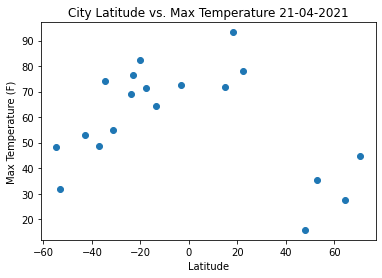

Latitude of city plotted against maximum temperature of the city on 21-04-2021.


In [29]:
# Set x and y axis for scatter plot of Latitude vs. Max Temperature
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Max. Temp"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'City Latitude vs. Max Temperature {retrieval_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save plotted figure as .png
plt.savefig("images/latitude_temperature.png")

# Show scatter plot
plt.show()
print(f"Latitude of city plotted against maximum temperature of the city on {retrieval_date}.")

## Latitude vs. Humidity Plot

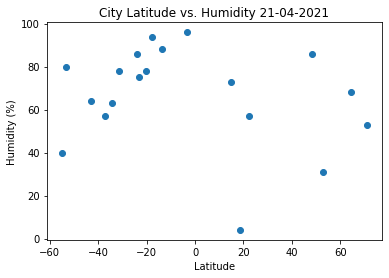

Latitude of city plotted against humidity of the city on 21-04-2021.


In [30]:
# Set x and y axis for scatter plot of Latitude vs. Humidity
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Humidity"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'City Latitude vs. Humidity {retrieval_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save plotted figure as .png
plt.savefig("images/latitude_humidity.png")

# Show scatter plot
plt.show()
print(f"Latitude of city plotted against humidity of the city on {retrieval_date}.")

## Latitude vs. Cloudiness Plot

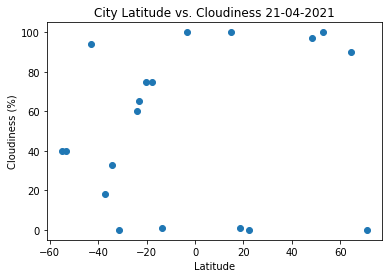

Latitude of city plotted against Cloudiness of the city on 21-04-2021.


In [31]:
# Set x and y axis for scatter plot of Latitude vs. Cloudiness
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Cloudiness"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'City Latitude vs. Cloudiness {retrieval_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save plotted figure as .png
plt.savefig("images/cloudiness_temperature.png")

# Show scatter plot
plt.show()
print(f"Latitude of city plotted against Cloudiness of the city on {retrieval_date}.")

## Latitude vs. Wind Speed Plot

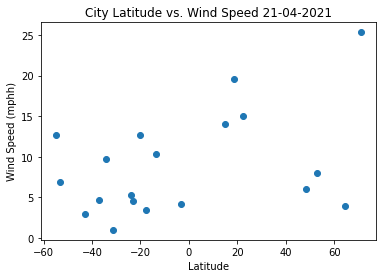

Latitude of city plotted against Wind Speed of the city on 21-04-2021.


In [32]:
# Set date x and y axis for scatter plot of Latitude vs. Wind Speed
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Wind Speed"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'City Latitude vs. Wind Speed {retrieval_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mphh)')

# Save plotted figure as .png
plt.savefig("images/latitude_wind_speed.png")

# Show scatter plot
plt.show()
print(f"Latitude of city plotted against Wind Speed of the city on {retrieval_date}.")

## Linear Regression

In [33]:
# Reduce the clean dataframe to cities only in the Northern Hemisphere
northern_hemisphere_df = clean_city_data_df.query(f"Lat >= 0")
northern_hemisphere_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,sao filipe,14.8961,-24.4956,71.82,73,100,14.09,CV,1618994639
5,victoria,22.2855,114.1577,78.01,57,0,15.01,HK,1618994428
6,berlevag,70.8578,29.0864,44.60,53,0,25.32,NO,1618994643
7,kirkland lake,48.1446,-80.0377,15.80,86,97,6.06,CA,1618994495
14,tashtyp,52.7939,89.8983,35.26,31,100,8.05,RU,1618994504


In [34]:
# Reduce the clean dataframe to cities only in the Southern Hemisphere
Lat=0
southern_hemisphere_df = clean_city_data_df.query(f"Lat < 0")
southern_hemisphere_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,48.20,40,40,12.66,AR,1618994487
1,punta arenas,-53.1500,-70.9167,32.00,80,40,6.91,CL,1618994637
2,pisco,-13.7000,-76.2167,64.40,88,1,10.36,PE,1618994638
4,trairi,-3.2778,-39.2689,72.46,96,100,4.21,BR,1618994640
8,santa cruz,-17.8000,-63.1667,71.60,94,75,3.44,BO,1618994646


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.7992941622114564


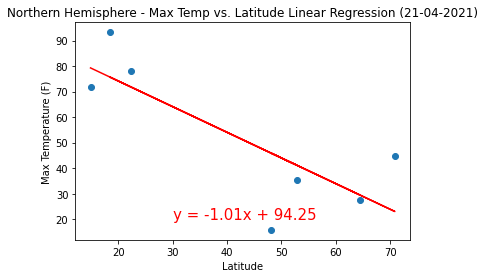

Latitude of Northern cities plotted against maximum temperature of those cities on 21-04-2021.


In [35]:
# Set x and y axis for scatter plot of Northern Hemisphere Latitude vs. Max Temperature
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Max. Temp"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({retrieval_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save plotted figure as .png
plt.savefig("images/north_hem_temperature.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Northern cities plotted against maximum temperature of those cities on {retrieval_date}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7738130430455127


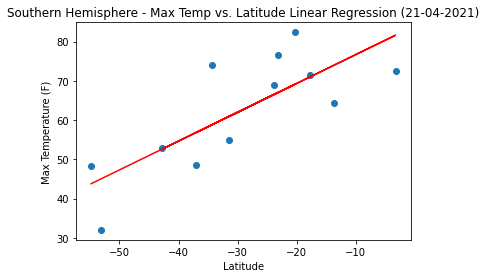

Latitude of Southern cities plotted against maximum temperature of those cities on 21-04-2021.


In [36]:
# Set x and y axis for scatter plot of Southern Hemisphere Latitude vs. Max Temperature
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Max. Temp"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-45,8),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({retrieval_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save plotted figure as .png
plt.savefig("images/south_hem_temperature.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Southern cities plotted against maximum temperature of those cities on {retrieval_date}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.21841430936148493


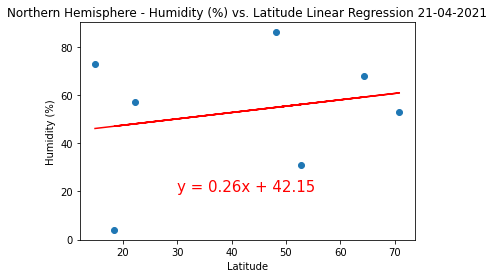

Latitude of Northern cities plotted against Humidity of those cities on 21-04-2021.


In [37]:
# Set x and y axis for scatter plot of Northern Hemisphere Latitude vs. Humidity
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Humidity"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {retrieval_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save plotted figure as .png
plt.savefig("images/north_hem_humidity.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Northern cities plotted against Humidity of those cities on {retrieval_date}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.7705802876716527


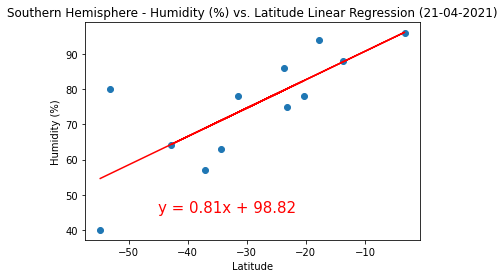

Latitude of Southern cities plotted against Humidity of those cities on 21-04-2021.


In [38]:
# Set x and y axis for scatter plot of Southern Hemisphere Latitude vs. Humidity
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Humidity"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-45,45),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({retrieval_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save plotted figure as .png
plt.savefig("images/south_hem_humidity.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Southern cities plotted against Humidity of those cities on {retrieval_date}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.15142137901315747


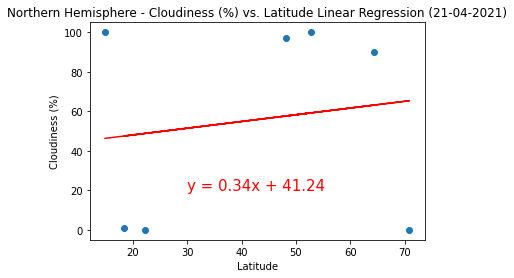

Latitude of Northern cities plotted against Cloudiness of those cities on 21-04-2021.


In [39]:
# Set x and y axis for scatter plot of Northern Hemisphere Latitude vs. Cloudiness
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Cloudiness"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({retrieval_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save plotted figure as .png
plt.savefig("images/north_hem_cloudiness.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Northern cities plotted against Cloudiness of those cities on {retrieval_date}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2659930768838083


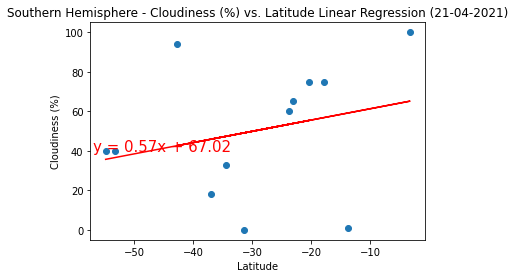

Latitude of Southern cities plotted against Cloudiness of those cities on 21-04-2021.


In [40]:
# Set x and y axis for scatter plot of Southern Hemisphere Latitude vs. Max Temperature
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Cloudiness"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-57,40),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({retrieval_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save plotted figure as .png
plt.savefig("images/south_hem_cloudiness.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Southern cities plotted against Cloudiness of those cities on {retrieval_date}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.15612357944388003


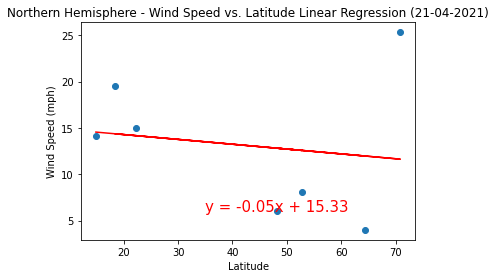

Latitude of Northern cities plotted against Wind Speed of those cities on 21-04-2021.


In [43]:
# Set x and y axis for scatter plot of Northern Hemisphere Latitude vs. Wind Speed
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Wind Speed"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(35,6),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ({retrieval_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save plotted figure as .png
plt.savefig("images/north_hem_wind_speed.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Northern cities plotted against Wind Speed of those cities on {retrieval_date}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.16218845325664663


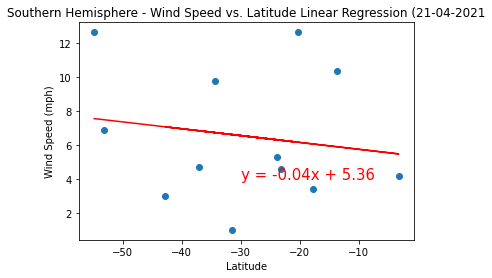

Latitude of Southern cities plotted against Wind Speed of those cities on 21-04-2021.


In [45]:
# Set x and y axis for scatter plot of Southern Hemisphere Latitude vs. Wind Speed
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Wind Speed"]

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,4),fontsize=15,color="red")

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title(f'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({retrieval_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save plotted figure as .png
plt.savefig("images/south_hem_wind_speed.png")

# Show scatter plot
print(f"The r-value is {rvalue}")
plt.show()
print(f"Latitude of Southern cities plotted against Wind Speed of those cities on {retrieval_date}.")